In [ ]:
import pandas as pd

df = pd.read_csv('/archive (9).zip')

df.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [ ]:
df.tail()

,CATEGORY,MESSAGE,FILE_NAME
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0
5795,0,"If you run Pick, and then use the ""New FTOC"" b...",00747.352d424267d36975a7b40b85ffd0885e


In [ ]:
df['CATEGORY'].value_counts()

,count
CATEGORY,
0,3900
1,1896


In [ ]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
test_message = "Hey Bhairav, This is the NLP Project"

test_message_tokenized = tokenizer.tokenize(test_message)
test_message_tokenized

['Hey', 'Bhairav', 'This', 'is', 'the', 'NLP', 'Project']

In [ ]:
test_message_lowercased = [t.lower() for t in test_message_tokenized]
test_message_lowercased

['hey', 'bhairav', 'this', 'is', 'the', 'nlp', 'project']

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

test_message_lemmatized_tokens = [lemmatizer.lemmatize(t) for t in test_message_lowercased]
test_message_lemmatized_tokens

['hey', 'bhairav', 'this', 'is', 'the', 'nlp', 'project']

In [ ]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

test_message_useful_tokens = [t for t in test_message_lemmatized_tokens if t not in stopwords]
test_message_useful_tokens

['hey', 'bhairav', 'nlp', 'project']

In [ ]:
def message_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t not in stopwords]

  return useful_tokens

message_to_token_list(test_message)

['hey', 'bhairav', 'nlp', 'project']

In [ ]:
df = df.sample(frac=1, random_state=1)
df = df.reset_index(drop=True)

split_index = int(len(df) * 0.8)
train_df, test_df = df[:split_index], df[split_index:]

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df, test_df

(      CATEGORY                                            MESSAGE  \
 0            1  \n\n<HTML><FONT  BACK="#ffffff" style="BACKGRO...   
 1            1  <html><body bgColor="#CCCCCC" topmargin=1 onMo...   
 2            0  Quoting Paul Linehan (plinehan@yahoo.com):\n\n...   
 3            0  <a href=http://www.aaronsw.com/weblog/>\n\nAar...   
 4            0  Oh yeah, the link for more info:\n\n\n\nhttp:/...   
 ...        ...                                                ...   
 4631         0  Gregory Alan Bolcer:\n\n>I'm not sure since I ...   
 4632         1  New Account For: zzzz@spamassassin.taint.org\n...   
 4633         0  >>>>> "O" == Owen Byrne <owen@permafrost.net> ...   
 4634         0  This is an automated response to a message you...   
 4635         0  http://www.ouchytheclown.com/welcome.html\n\n\...   
 
                                    FILE_NAME  
 0     00118.141d803810acd9d4fc23db103dddfcd9  
 1     00463.0bc4e08af0529dd773d9f10f922547db  
 2     00358.8

In [ ]:
token_counter = {}

for message in train_df['MESSAGE']:
  message_as_token_lst = message_to_token_list(message)

  for token in message_as_token_lst:
    if token in token_counter:
      token_counter[token] += 1
    else:
      token_counter[token] = 1

len(token_counter)

86439

In [ ]:
token_counter

{'html': 4175,
 'font': 35005,
 'back': 1055,
 'ffffff': 2535,
 'style': 3349,
 'background': 789,
 'color': 9642,
 'size': 13107,
 '3': 3581,
 'ptsize': 450,
 '12': 985,
 'b': 12856,
 'viagra': 66,
 '000000': 1923,
 '2': 7993,
 '10': 2182,
 'family': 1491,
 'sansserif': 314,
 'face': 9950,
 'arial': 6187,
 'lang': 419,
 '0': 9445,
 'br': 16013,
 'breakthrough': 22,
 'medication': 50,
 'impotence': 13,
 'delivered': 79,
 'mailbox': 71,
 'without': 658,
 'leaving': 50,
 'computer': 640,
 'simply': 377,
 'click': 2144,
 'href': 3875,
 'http': 14926,
 'host': 158,
 '1bulk': 12,
 'email': 4015,
 'software': 1129,
 'com': 11675,
 'ch4': 12,
 'pharm': 12,
 'blue': 181,
 'less': 473,
 '5': 2932,
 'minute': 366,
 'complete': 403,
 'line': 1307,
 'consultation': 68,
 'many': 1004,
 'case': 681,
 '24': 575,
 'nbsp': 9732,
 'hour': 589,
 'gt': 108,
 'website': 488,
 'treatment': 33,
 'compromised': 12,
 'sexual': 120,
 'function': 202,
 'convenient': 36,
 'affordable': 55,
 'confidential': 135,
 

In [ ]:
def keep_token(proccessed_token, threshold):
  if proccessed_token not in token_counter:
    return False
  else:
    return token_counter[proccessed_token] > threshold

keep_token('random', 100)

False

In [ ]:
features = set()

for token in token_counter:
  if keep_token(token, 10000):
    features.add(token)

features

{'3d', 'b', 'br', 'com', 'font', 'http', 'p', 'size', 'td', 'tr'}

In [ ]:
features = list(features)
features

['p', 'http', 'font', 'size', 'com', 'tr', '3d', 'br', 'b', 'td']

In [ ]:
token_to_index_mapping = {t:i for t, i in zip(features, range(len(features)))}
token_to_index_mapping

{'p': 0,
 'http': 1,
 'font': 2,
 'size': 3,
 'com': 4,
 'tr': 5,
 '3d': 6,
 'br': 7,
 'b': 8,
 'td': 9}

In [ ]:
message_to_token_list('3d b <br> .com bad font font com randoms')

['3d', 'b', 'br', 'com', 'bad', 'font', 'font', 'com', 'randoms']

In [ ]:
import numpy as np

def message_to_count_vector(message):
  count_vector = np.zeros(len(features))

  processed_list_of_tokens = message_to_token_list(message)

  for token in processed_list_of_tokens:
    if token not in features:
      continue
    index = token_to_index_mapping[token]
    count_vector[index] += 1

  return count_vector

message_to_count_vector('3d b <br> .com bad font font com randoms')

array([0., 0., 2., 0., 2., 0., 1., 1., 1., 0.])

In [ ]:
message_to_count_vector(train_df['MESSAGE'].iloc[3])

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
train_df.iloc[3]

,3
CATEGORY,0
MESSAGE,<a href=http://www.aaronsw.com/weblog/>\n\nAar...
FILE_NAME,01274.0d083a2d3b30061efdc2cc73ee9e76e3


In [ ]:
def df_to_X_y(dff):
  y = dff['CATEGORY'].to_numpy().astype(int)

  message_col = dff['MESSAGE']
  count_vectors = []

  for message in message_col:
    count_vector = message_to_count_vector(message)
    count_vectors.append(count_vector)

  X = np.array(count_vectors).astype(int)

  return X, y

In [ ]:
X_train, y_train = df_to_X_y(train_df)

X_test, y_test = df_to_X_y(test_df)

X_train.shape, y_train.shape, X_test.shape, y_test.shape
#4636 training msg
#each msg is turned into 10 tokens
#1160 with same feature length

((4636, 10), (4636,), (1160, 10), (1160,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

X_train

array([[0.        , 0.025     , 0.00245851, ..., 0.04064039, 0.00985222,
        0.        ],
       [0.04065041, 0.00833333, 0.00860479, ..., 0.0270936 , 0.0591133 ,
        0.01346801],
       [0.00406504, 0.00416667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00416667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00416667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00406504, 0.0125    , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression().fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       788
           1       0.99      0.32      0.48       372

    accuracy                           0.78      1160
   macro avg       0.87      0.66      0.67      1160
weighted avg       0.83      0.78      0.74      1160



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       788
           1       0.90      0.57      0.70       372

    accuracy                           0.84      1160
   macro avg       0.86      0.77      0.79      1160
weighted avg       0.85      0.84      0.83      1160



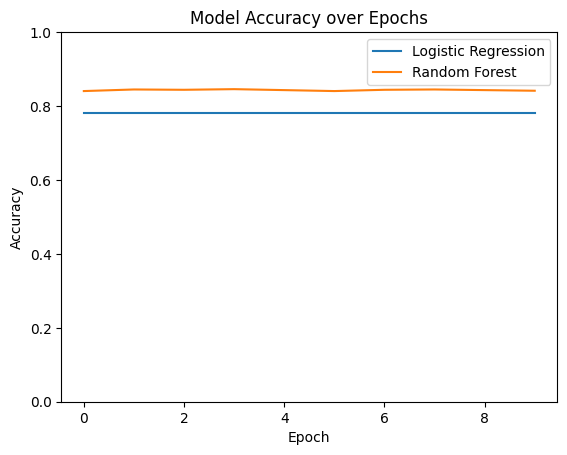

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

lr_accuracy_scores = []
rf_accuracy_scores = []

num_epochs = 10

lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

for epoch in range(num_epochs):
    lr_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test))
    rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

    lr_accuracy_scores.append(lr_accuracy)
    rf_accuracy_scores.append(rf_accuracy)

plt.plot(lr_accuracy_scores, label='Logistic Regression')
plt.plot(rf_accuracy_scores, label='Random Forest')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend()
plt.show()